<a href="https://colab.research.google.com/github/PapeAlioune1996/MyDataScienceNotebook/blob/master/Projet_final_Ventes_de_maisons_dans_le_comt%C3%A9_de_King.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [4]:
import requests
def download(url, filename):
    """Downloads a file from a URL using the requests library."""
    response = requests.get(url)
    response.raise_for_status()  # Raise an exception for bad status codes
    with open(filename, "wb") as f:
        f.write(response.content)

In [5]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

In [6]:
download(filepath, "housing.csv")
file_name="housing.csv"

In [7]:
df = pd.read_csv(file_name)

In [8]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Question 1
Affichez les types de données de chaque colonne à l'aide de la fonction dtypes. Faites une capture d'écran de votre code et de votre résultat. Vous devrez soumettre la capture d'écran pour le projet final.

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

Nous utilisons la méthode décrite pour obtenir un résumé statistique de la base de données.

In [10]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Module 2 : Traitement des données

Question 2
Supprimez les colonnes « id » et « Unnamed : 0 » de l'axe 1 en utilisant la méthode drop(), puis utilisez la méthode describe() pour obtenir un résumé statistique des données. Assurez-vous que le paramètre inplace est fixé à True. Faites une capture d'écran de votre code et de votre résultat. Vous devrez soumettre la capture d'écran pour le projet final.

In [15]:
df.drop(['id','Unnamed: 0'], axis=1, inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Nous pouvons constater que nous avons des valeurs manquantes pour les colonnes chambres et salles de bain

In [16]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


Nous pouvons remplacer les valeurs manquantes de la colonne « chambres » par la moyenne de la colonne « chambres » à l'aide de la méthode replace(). N'oubliez pas de donner au paramètre inplace la valeur True.

In [17]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

Nous remplaçons également les valeurs manquantes de la colonne « salles de bain » par la moyenne de la colonne « salles de bain » à l'aide de la méthode replace(). N'oubliez pas de définir le paramètre inplace top True

In [18]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [19]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


Module 3 : Analyse exploratoire des données

Question 3
Utilisez la méthode value_counts pour compter le nombre de maisons ayant des valeurs d'étage uniques, utilisez la méthode .to_frame() pour la convertir en un cadre de données. Faites une capture d'écran de votre code et de votre résultat. Vous devrez soumettre la capture d'écran pour le projet final.

In [21]:
floors_counts = df['floors'].value_counts().to_frame()
floors_counts

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


Question 4
Utilisez la fonction boxplot de la bibliothèque seaborn pour déterminer si les maisons avec vue sur l'eau ou sans vue sur l'eau ont plus de prix aberrants. Faites une capture d'écran de votre code et de votre boxplot.

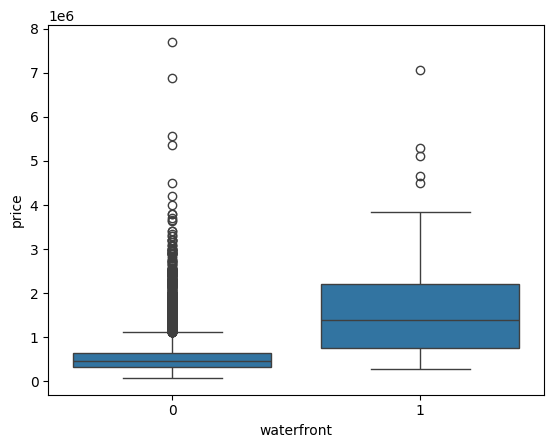

In [22]:

sns.boxplot(x="waterfront", y="price", data=df)
plt.show()

Utilisez la fonction regplot de la bibliothèque seaborn pour déterminer si la caractéristique sqft_above est corrélée négativement ou positivement avec le prix.



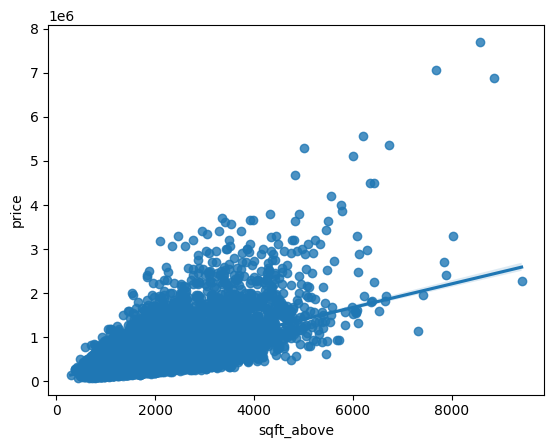

In [24]:
sns.regplot(x="sqft_above", y="price", data=df)
plt.show()

Nous pouvons utiliser la méthode Pandas <code>corr()</code> pour trouver la caractéristique autre que le prix qui est la plus corrélée avec le prix.

In [28]:
# Convert the 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Extract year from the 'date' column and create a new 'year' column
df['year'] = df['date'].dt.year

# Calculate correlations, excluding the original 'date' column
df.drop(columns=['date']).corr()['price'].sort_values(ascending=False)


,price
price,1.000000
sqft_living,0.702035
grade,0.667434
sqft_above,0.605567
sqft_living15,0.585379
bathrooms,0.525738
view,0.397293
sqft_basement,0.323816
bedrooms,0.308797
lat,0.307003


Module 4 : Développement de modèles
Nous pouvons ajuster un modèle de régression linéaire en utilisant la caractéristique de longitude 'long' et calculer le R^2.

In [29]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

Question 6
Ajustez un modèle de régression linéaire pour prédire le « prix » à l'aide de la caractéristique « sqft_living », puis calculez le R^2.

In [32]:
Z= df[['sqft_living']]
lm1 = LinearRegression()
lm1.fit(Z, Y)
lm1.score(Z, Y)

0.4928532179037931

Question 7
Ajustez un modèle de régression linéaire pour prédire le « prix » à l'aide de la liste des caractéristiques :

In [33]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

Calculez ensuite le R^2.

In [34]:
F = df[features]
lm2 = LinearRegression()
lm2.fit(F, Y)
lm2.score(F, Y)

0.65769516660375

Ceci vous aidera à répondre à la question 8
Créez une liste de tuples dont le premier élément contient le nom de l'estimateur :

In [35]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

Question 8

Utilisez la liste pour créer un objet pipeline afin de prédire le « prix », ajustez l'objet à l'aide des caractéristiques de la liste et calculez le R^2.

In [38]:
pipe = Pipeline(Input)
pipe.fit(F, Y)
pipe.score(F, Y)

0.7513408515988734

Module 5 : Évaluation et perfectionnement du modèle

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [40]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


Question 9
Créez et ajustez un objet de régression Ridge en utilisant les données d'apprentissage, fixez le paramètre de régularisation à 0,1, et calculez le R^2 en utilisant les données de test. Faites une capture d'écran de votre code et de la valeur de R^2. Vous devrez la soumettre pour le projet final.

In [41]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score # Import r2_score

RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

0.6478759163939112


Question 10
Effectuez une transformation polynomiale de second ordre sur les données d'apprentissage et les données de test. Créez et ajustez un objet de régression Ridge en utilisant les données d'apprentissage, réglez le paramètre de régularisation à 0,1 et calculez le R^2 en utilisant les données de test fournies.

In [42]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel_pr = Ridge(alpha=0.1)
RidgeModel_pr.fit(x_train_pr, y_train)
yhat_pr = RidgeModel_pr.predict(x_test_pr)
print(r2_score(y_test, yhat_pr))

0.7002744267906067
